In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#seeing how np.random.rand works
random_np = np.random.rand(3,4)
random_np

array([[0.23832812, 0.89621686, 0.67289982, 0.73851862],
       [0.07146173, 0.82945891, 0.55810809, 0.17857719],
       [0.6057531 , 0.98054477, 0.50938115, 0.1793685 ]])

Text(0, 0.5, 'y dataset')

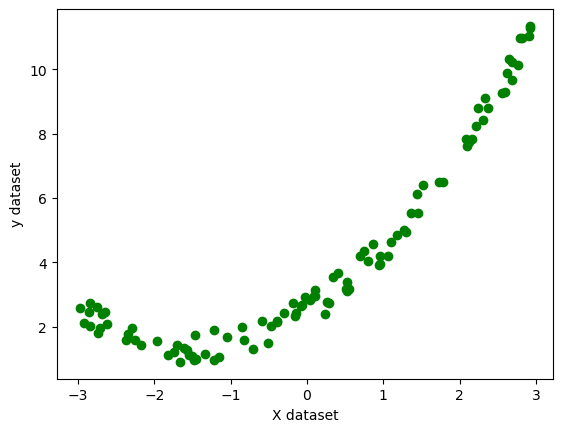

In [6]:
#initializing X with 100 random numbers
X = 6 * np.random.rand(100,1) - 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.rand(100,1)
#quadratic equation of form y = 0.5x^2 + 1.5x + 2 + outliers
plt.scatter(X, y, color='g')
plt.xlabel('X dataset')
plt.ylabel('y dataset')

### y is a polynomial with degree 2

## Trying to fit a Linear Regression model and a Polynomial Regression model to see how Error behaves.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
#implementing a simple linear regression
from sklearn.linear_model import LinearRegression
regression_l = LinearRegression()

In [9]:
regression_l.fit(X_train, y_train)

LinearRegression()

In [10]:
from sklearn.metrics import r2_score
linear_score = r2_score(y_test, regression_l.predict(X_test))
linear_score

0.7799603100836419

In [11]:
#intercept and slope of linear model
c = regression_l.intercept_
m = regression_l.coef_

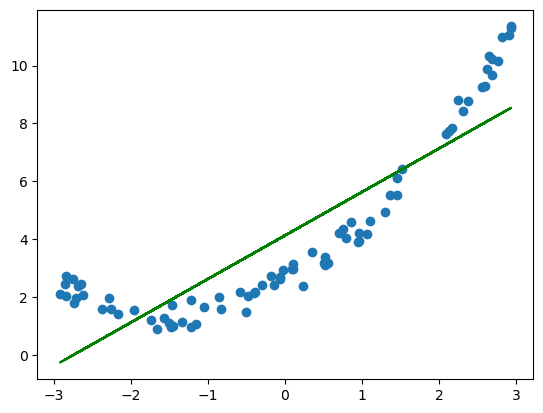

In [13]:
#visualizing the model
plt.plot(X_train, (m*X_train)+c, color='green')
plt.scatter(X_train, y_train)

## Create Polynomial features

In [14]:
from sklearn.preprocessing import PolynomialFeatures

In [19]:
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [20]:
X_train_poly[:3]

array([[1.        , 0.55195896, 0.30465869],
       [1.        , 2.12922343, 4.53359242],
       [1.        , 1.10362589, 1.21799011]])

In [22]:
regression_p = LinearRegression()
regression_p.fit(X_train_poly, y_train)
poly_score = r2_score(y_test, regression_p.predict(X_test_poly))
linear_score, poly_score

(0.7799603100836419, 0.9923404232968673)

In [27]:
m_p = regression_p.coef_
m_p

array([[0.        , 1.49141088, 0.49195344]])

In [28]:
c_p = regression_p.intercept_
c_p

array([2.53568806])

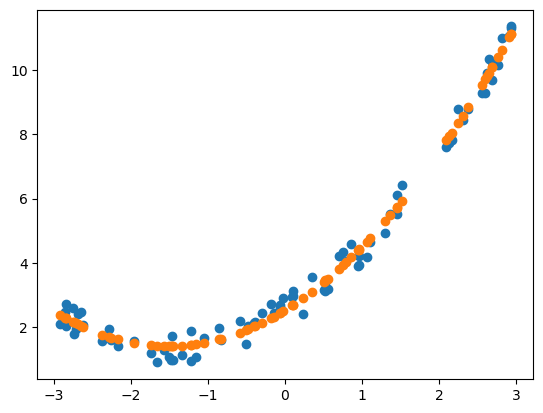

In [32]:
plt.scatter(X_train, y_train)
plt.scatter(X_train, regression_p.predict(X_train_poly))

### Testing degree = 3

In [34]:
cubic = PolynomialFeatures(degree=3, include_bias=True)
X_train_cubic = cubic.fit_transform(X_train)
X_test_cubic = cubic.transform(X_test)

regression_c = LinearRegression()
regression_c.fit(X_train_cubic, y_train)
cubic_score = r2_score(y_test, regression_c.predict(X_test_cubic))
linear_score, poly_score, cubic_score

(0.7799603100836419, 0.9923404232968673, 0.9923739393397956)

### Prediction for new dataset

In [35]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
X_new_poly[:3]

array([[ 1.        , -3.        ,  9.        ],
       [ 1.        , -2.96984925,  8.82000455],
       [ 1.        , -2.93969849,  8.64182723]])

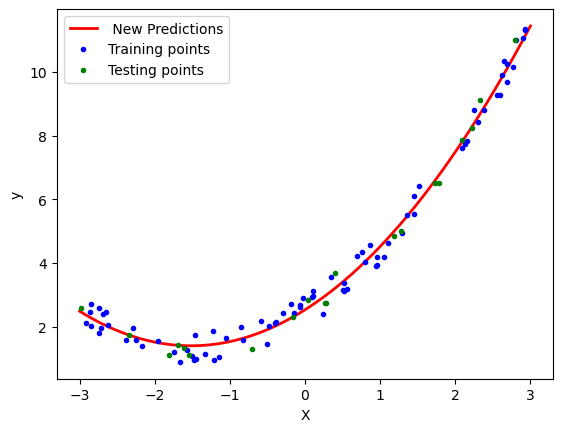

In [42]:
y_new = regression_p.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label=" New Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [43]:
y_new[:3]

array([[2.48903636],
       [2.44545414],
       [2.40276636]])

## Pipelining

In [47]:
from sklearn.pipeline import Pipeline

In [45]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()

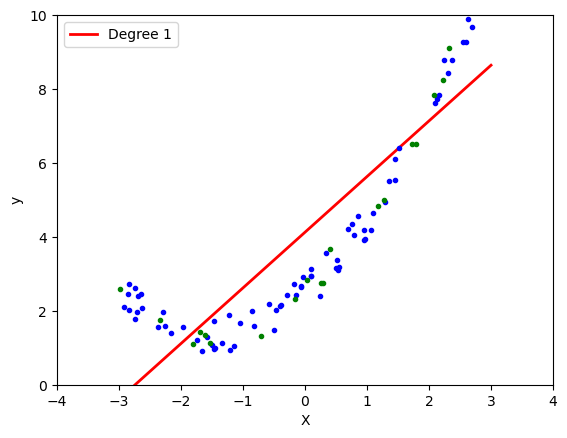

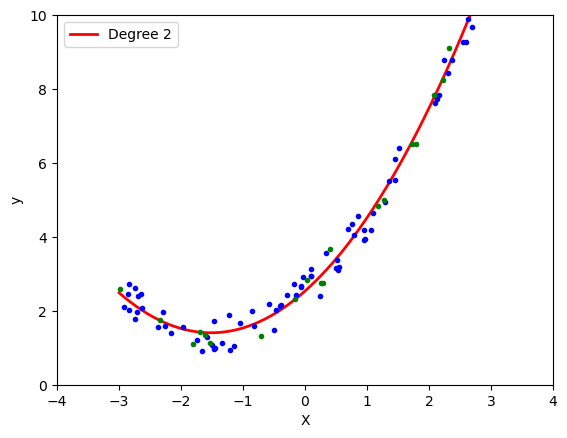

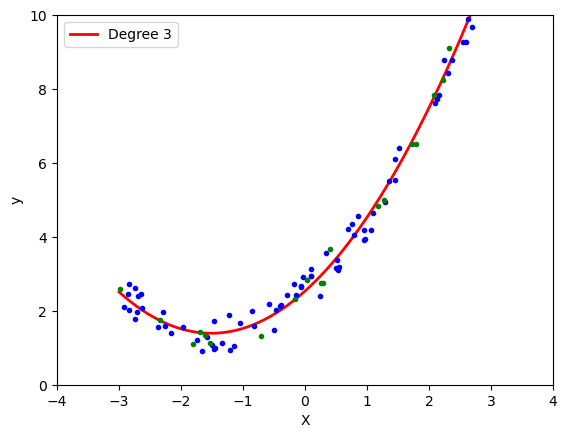

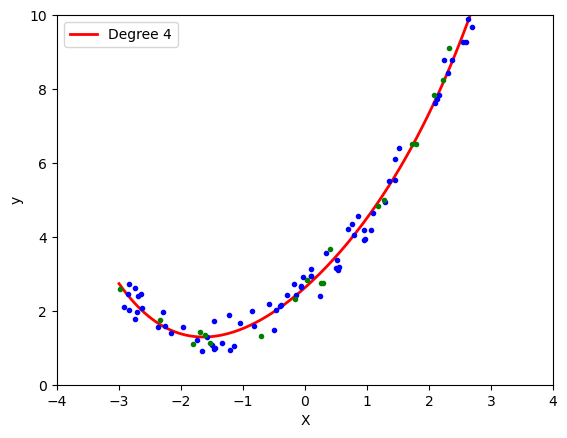

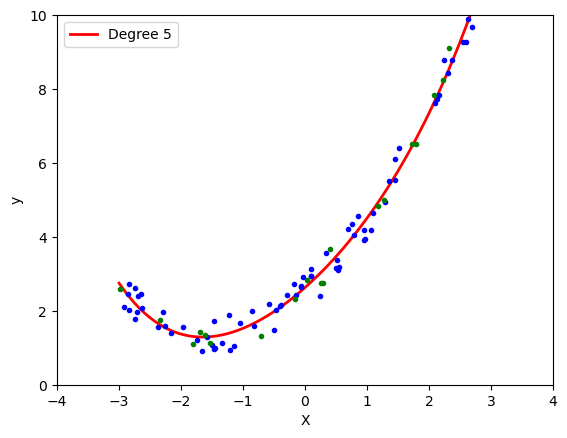

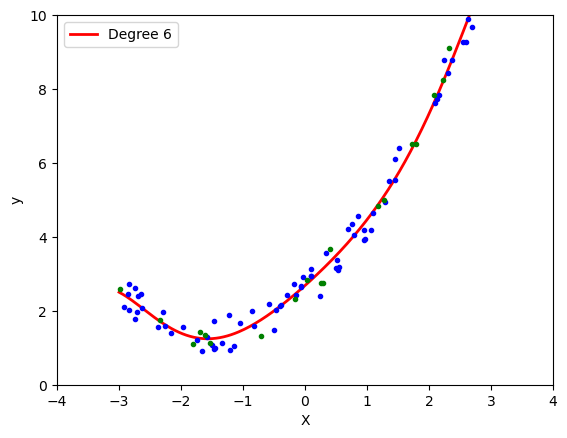

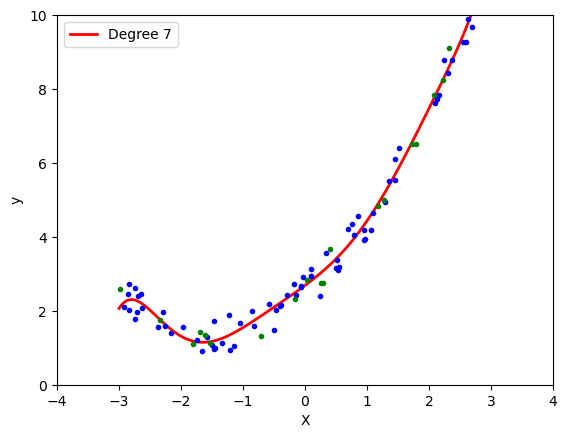

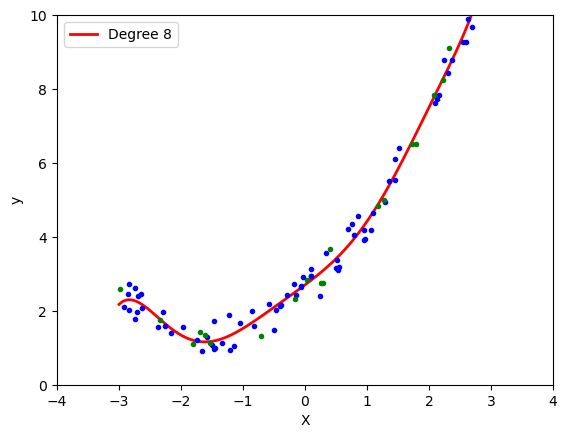

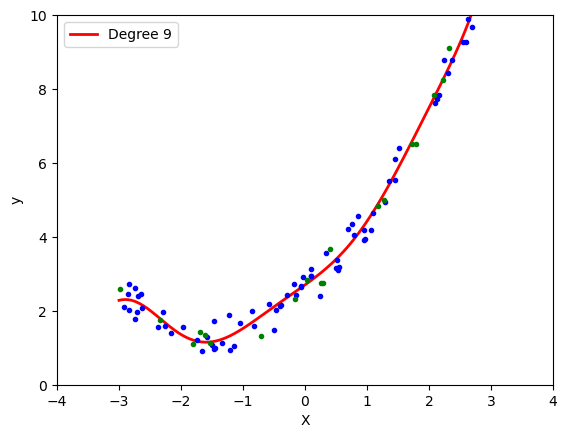

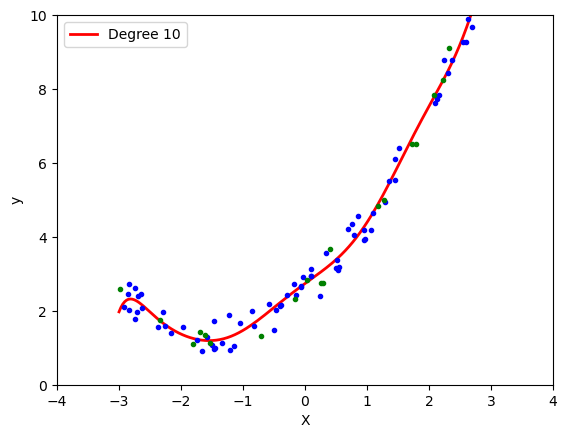

In [51]:
#testing regression curve for degrees from 1 to 10
for degree in range(1,11):
    poly_regression(degree)